In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from functions import preprocess_titanic
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestCentroid

In [2]:
SEED=42

In [3]:
def clustering_gmm(x, n_components):
    transformer = GaussianMixture(n_components=n_components, random_state=SEED).fit(x)
    tmp = transformer.predict(x).reshape(-1,1)
    b = np.zeros((tmp.size, tmp.max() + 1))
    b[np.arange(tmp.size), tmp] = 1
    res = np.concatenate([x,b], axis=1)
    return res

def clustering_agglomerative(x, n_components):
    transformer = AgglomerativeClustering(n_clusters=n_components,compute_distances=True).fit(x)
    tmp = transformer.labels_.reshape(-1,1)
    b = np.zeros((tmp.size, tmp.max() + 1))
    b[np.arange(tmp.size), tmp] = 1
    res = np.concatenate([x,b], axis=1)
    return res

In [4]:
def scale_data(x):
    scaler = MinMaxScaler()
    data = np.array(x).reshape(-1,1)
    scaler.fit(data)
    return scaler.fit_transform(data).reshape(-1).tolist()

In [5]:
dm_algorithms = ["Baseline", "GMM", "AgglomerativeClustering"]

# Titanic

In [6]:
X_train, X_test, y_train, y_test, supervised_labels = preprocess_titanic(normalized=True)

# NN

/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Baseline 18
GMM 20
AgglomerativeClustering 26


/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


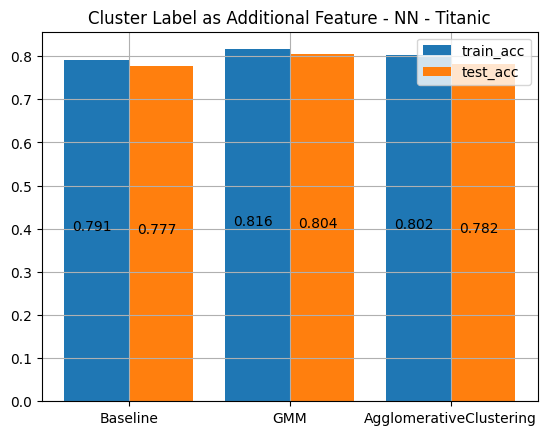

In [7]:
train_acc = {}
test_acc = {}
for z in dm_algorithms:
    if z == "Baseline":
        train_data = X_train
        test_data = X_test
    elif z == "GMM":
        train_data = clustering_gmm(X_train, 13)
        test_data = clustering_gmm(X_test, 13)
    elif z == "AgglomerativeClustering":
        train_data = clustering_agglomerative(X_train, 16)
        test_data = clustering_agglomerative(X_test, 16)
    else:
        raise ValueError("Not Implemented")
    estimator = MLPClassifier(random_state=SEED, hidden_layer_sizes=25, solver="adam", batch_size=64, early_stopping=True)
    estimator.fit(train_data, y_train)
    print(z, estimator.n_iter_)

    y_pred = estimator.predict(train_data)
    train_acc[z] = accuracy_score(y_train.reshape(-1), y_pred)

    y_pred = estimator.predict(test_data)
    test_acc[z] = accuracy_score(y_test.reshape(-1), y_pred)


colors = mcolors.TABLEAU_COLORS
tmp_x, tmp_height = train_acc.keys() , train_acc.values()
X_axis = np.arange(len(tmp_x))
bars = plt.bar(X_axis - 0.2,tmp_height, color=colors["tab:blue"], label="train_acc", width=0.4)
for bar in bars:
   height = bar.get_height()
   plt.annotate('%.3f' % height, xy=(bar.get_x() + 0.05,height/2))
tmp_x, tmp_height = test_acc.keys() , test_acc.values()
X_axis = np.arange(len(tmp_x))
bars = plt.bar(X_axis + 0.2,tmp_height, color=colors["tab:orange"], label="test_acc", width=0.4)
for bar in bars:
   height = bar.get_height()
   plt.annotate('%.3f' % height, xy=(bar.get_x() + 0.05,height/2))
plt.xticks(X_axis, tmp_x) 
plt.legend()
plt.grid()
plt.title("Cluster Label as Additional Feature - NN - Titanic")
plt.show()
    